In [16]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [17]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [18]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

------ Endpoint not found - Sleeping for 5 seconds and retrying ------


In [19]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [20]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

df_exploded

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03710,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1489,nan
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,CK_Sphericity of the Earth,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1489,nan
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,CK_Visibility of Stars from Varied Locations,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1489,nan
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,CK_Rising and Setting Times at Different Locat...,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1489,nan
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00693,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1489,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
27421,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00690,CK_Circles of Equant Deferent Epicycle,http://sphaera.mpiwg-berlin.mpg.de/id/item/d7e...,2276,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1593,nan
27422,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01861,CK_11 Spheres,http://sphaera.mpiwg-berlin.mpg.de/id/item/d7e...,2276,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1593,nan
27423,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01239,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/d7e...,2276,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1593,nan
27424,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01969,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/d7e...,2276,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,1593,nan


In [21]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20451


In [22]:
# Define the target cks values with quotes
target_cks = [
    'CK_Seven Climate Zones', 
    'CK_Five Zones'
]

# Filter the DataFrame for matching cks values
filtered_df = df_exploded[df_exploded['cks'].isin(target_cks)]
filtered_df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
9,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00009,CK_Seven Climate Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Leipzig,1489,nan
12,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01864,CK_Five Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Leipzig,1489,nan
54,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00625,CK_Five Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/3ba...,1632,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1498,nan
60,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01001,CK_Five Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/3ba...,1632,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1498,nan
61,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01001,CK_Seven Climate Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/3ba...,1632,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1498,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
27343,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00321,CK_Five Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Translation, Content",805,Paris,1552,nan
27344,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00321,CK_Seven Climate Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Translation, Content",805,Paris,1552,nan
27366,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01403,CK_Five Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Content, Translation",805,Paris,1552,nan
27396,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03869,CK_Five Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Content, Translation",805,Paris,1552,nan


In [23]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 738


In [24]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_Five Zones             508
CK_Seven Climate Zones    272
Name: images, dtype: int64


C:\Users\nogas\AppData\Local\Temp\ipykernel_20756\1322993934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_20756\1322993934.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_20756\1322993934.py:19: FutureWarning: The default of observed=False is deprecated and will be

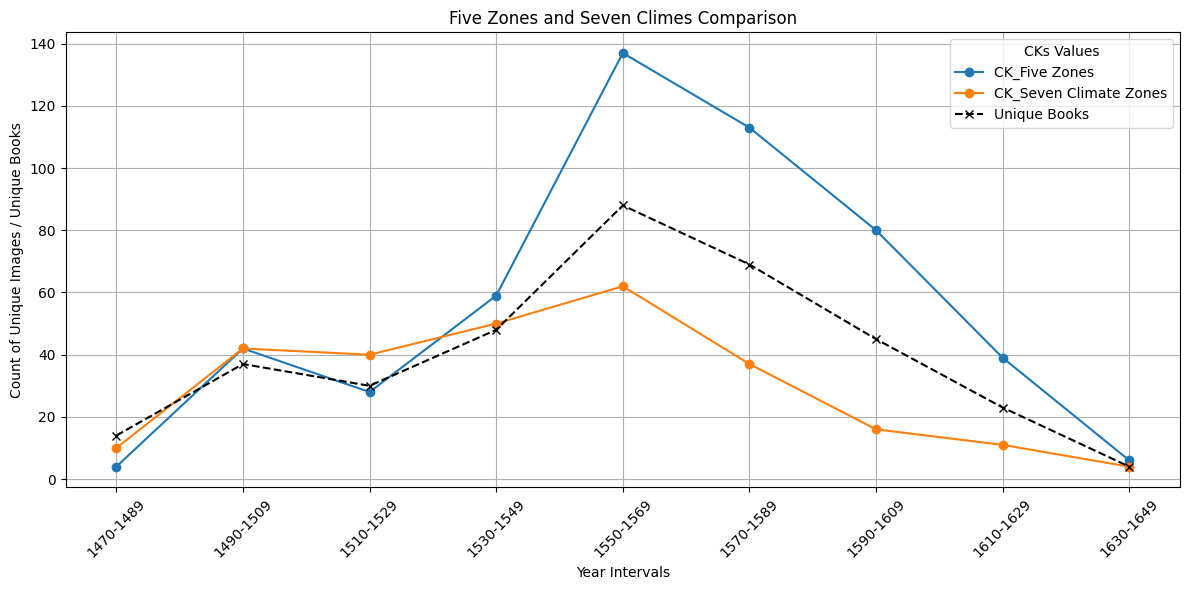

In [25]:
# Ensure the year columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'])['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval')['book'].nunique()  # Assuming 'title' is the column with book names

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting unique images for each cks value
for cks_value in unique_images_count.columns:
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

# Plot unique books counts as a line
plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

# Customize the plot
plt.title('Five Zones and Seven Climes Comparison')
plt.xlabel('Year Intervals')
plt.ylabel('Count of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKs Values')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
# Count unique cks values for each image
image_cks_count = filtered_df.groupby('images')['cks'].nunique()

# Filter for images that have more than one cks value
images_with_multiple_cks = image_cks_count[image_cks_count > 1]

# Count the number of unique images with more than one cks value
num_images_with_multiple_cks = images_with_multiple_cks.count()

# Display the result
print(f'Number of images with more than one cks value: {num_images_with_multiple_cks}')


Number of images with more than one cks value: 42


C:\Users\nogas\AppData\Local\Temp\ipykernel_20756\2633570414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_20756\2633570414.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_20756\2633570414.py:19: FutureWarning: The default of observed=False is deprecated and will be

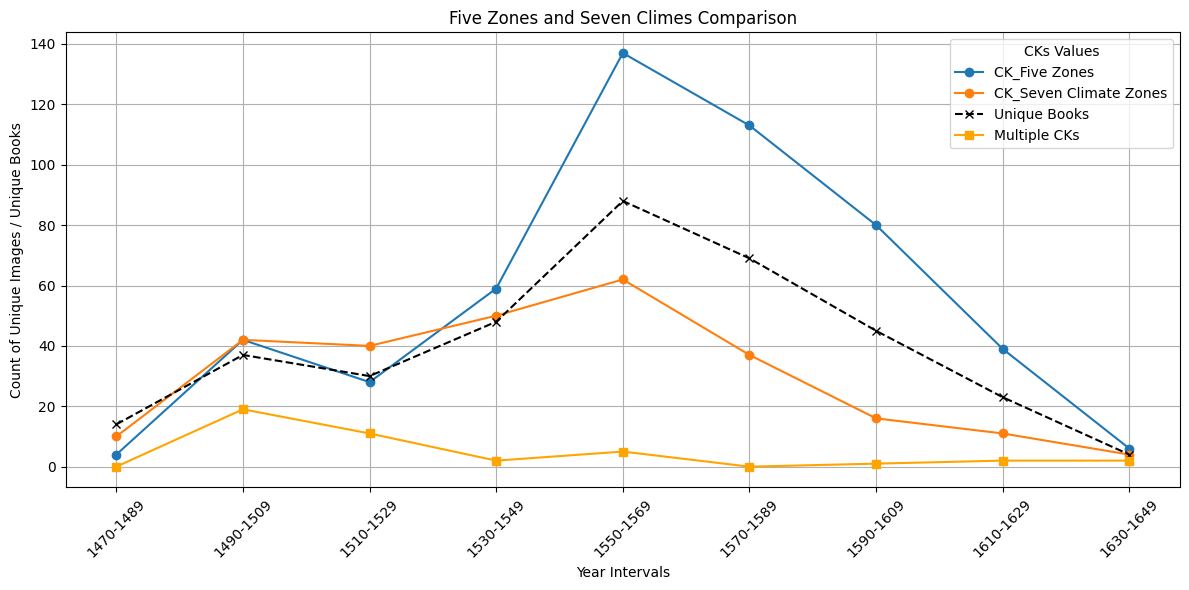

In [28]:
# Ensure the year columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'])['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval')['book'].nunique()  # Assuming 'title' is the column with book names

# Count images that have more than one cks value in each interval
# First, filter for images with more than one cks value
image_cks_count = filtered_df.groupby('images')['cks'].nunique()
images_with_multiple_cks = image_cks_count[image_cks_count > 1].index

# Now count these images in each interval
unique_images_multiple_cks_count = (filtered_df[filtered_df['images'].isin(images_with_multiple_cks)]
                                     .groupby('interval')['images'].nunique())

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting unique images for each cks value
for cks_value in unique_images_count.columns:
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

# Plot unique books counts as a line
plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

# Plot unique images with more than one cks value
plt.plot(unique_images_multiple_cks_count.index, unique_images_multiple_cks_count.values,
         marker='s', color='orange', linestyle='-', label='Multiple CKs')

# Customize the plot
plt.title('Five Zones and Seven Climes Comparison')
plt.xlabel('Year Intervals')
plt.ylabel('Count of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKs Values')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
#output cluster names from filtered_df and create an excel file for visual tagging

In [15]:
#combine with visual data

# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\natural_days_sun_motion.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

sun_motion_visual = pd.merge(filtered_df, excel_data, on='cluster_name', how='left')

sun_motion_visual

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,decoration,face,multiple moments,sign symbols,numbers,material object,multiple subjects sun and moon,tabular illustration,human figures,oblique circles two dimensional projection
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00453,CK_Circles of Natural Days,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,no,no,no,no,no,no,no,no,no,no
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01366,CK_Inequality of Natural Days,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,no,yes,no,no,no,no,no,no,no,no
2,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01969,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Content, Original Part",104,Venice,...,no,no,no,no,no,no,no,no,no,no
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01967,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Content, Original Part",104,Venice,...,no,no,yes,no,no,no,no,no,no,no
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00854,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02198,CK_Circles of Natural Days,http://sphaera.mpiwg-berlin.mpg.de/id/item/95c...,2183,http://sphaera.mpiwg-berlin.mpg.de/id/part/1d1...,Blebel's four books on the Sphere,"Original Part, Content",503,Wittenberg,...,no,no,no,no,yes,no,no,no,no,no
1215,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01239,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/d7e...,2276,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,...,no,no,no,no,no,no,no,no,no,no
1216,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01969,CK_Sun Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/d7e...,2276,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,"Original Part, Content",812,Antwerp,...,no,no,no,no,no,no,no,no,no,no
1217,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02004,CK_Circles of Natural Days,http://sphaera.mpiwg-berlin.mpg.de/id/item/fcd...,2265,http://sphaera.mpiwg-berlin.mpg.de/id/part/a22...,Introduction to Astronomy by Nunes,"Content, Original Part",777,Sine loco,...,no,no,no,no,no,no,no,no,no,no


C:\Users\nogas\AppData\Local\Temp\ipykernel_1420\3672351966.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_1420\3672351966.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_1420\3672351966.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

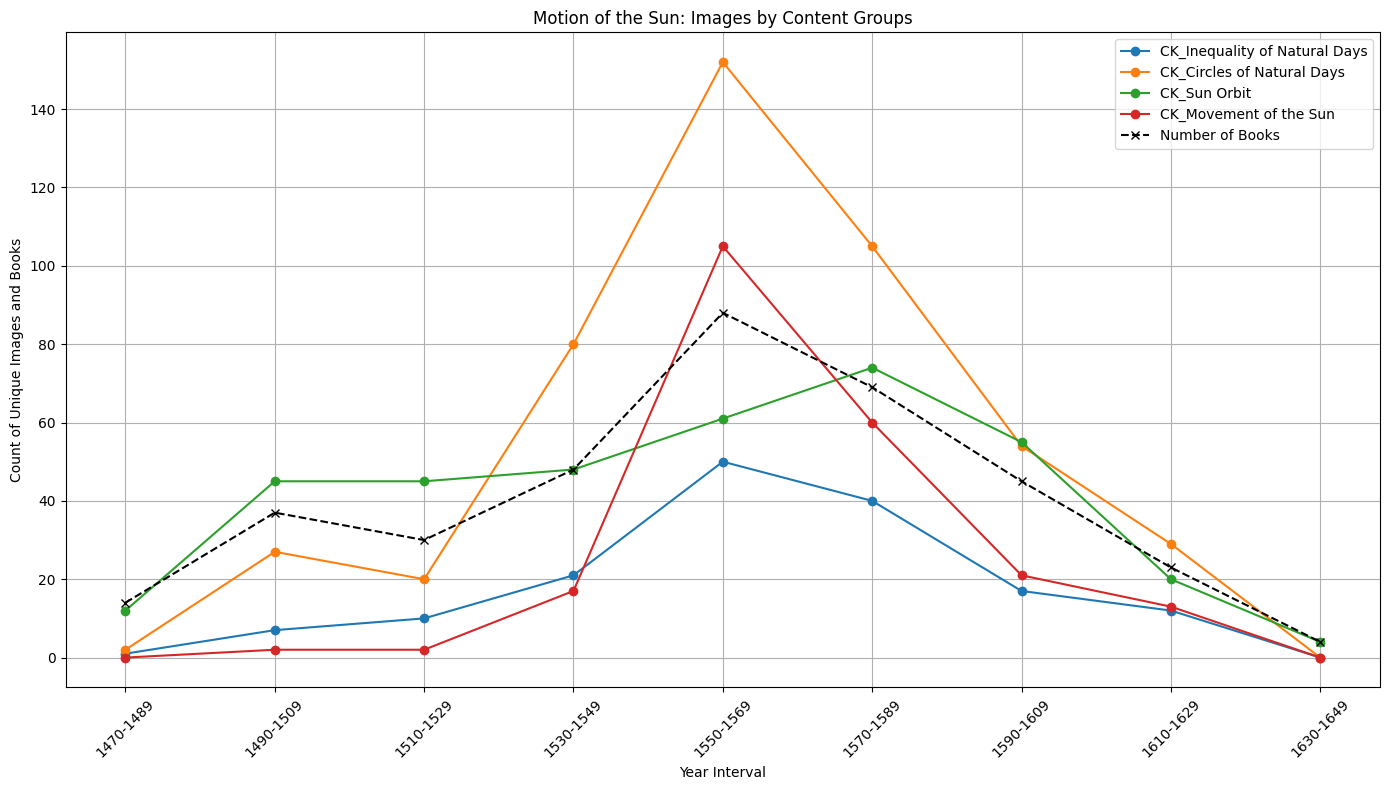

In [29]:
# Ensure the year column is of integer type
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the sun_motion_visual DataFrame
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Inequality of Natural Days', 
    'CK_Circles of Natural Days', 
    'CK_Sun Orbit', 
    'CK_Movement of the Sun'
]

# Initialize a DataFrame to hold unique images counts for each keyword
unique_images_counts = pd.DataFrame()

# Count unique images for each keyword in the defined intervals
for keyword in keywords:
    keyword_df = sun_motion_visual[sun_motion_visual['cks'] == keyword]
    unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_count.columns = ['interval', f'unique_images_{keyword}']
    
    # Merge the counts into the main DataFrame
    if unique_images_counts.empty:
        unique_images_counts = unique_images_count
    else:
        unique_images_counts = pd.merge(unique_images_counts, unique_images_count, on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the books count into the unique_images_counts DataFrame
final_counts = pd.merge(unique_images_counts, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword's unique images count
for keyword in keywords:
    plt.plot(final_counts['interval'], final_counts[f'unique_images_{keyword}'], 
             label=f'{keyword}', marker='o')

# Plot unique books as a reference line in broken black
plt.plot(final_counts['interval'], final_counts['unique_books'], 
         label='Number of Books', marker='x', linestyle='--', color='black')

plt.xlabel('Year Interval')
plt.ylabel('Count of Unique Images and Books')
plt.title('Motion of the Sun: Images by Content Groups')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#visual graphs

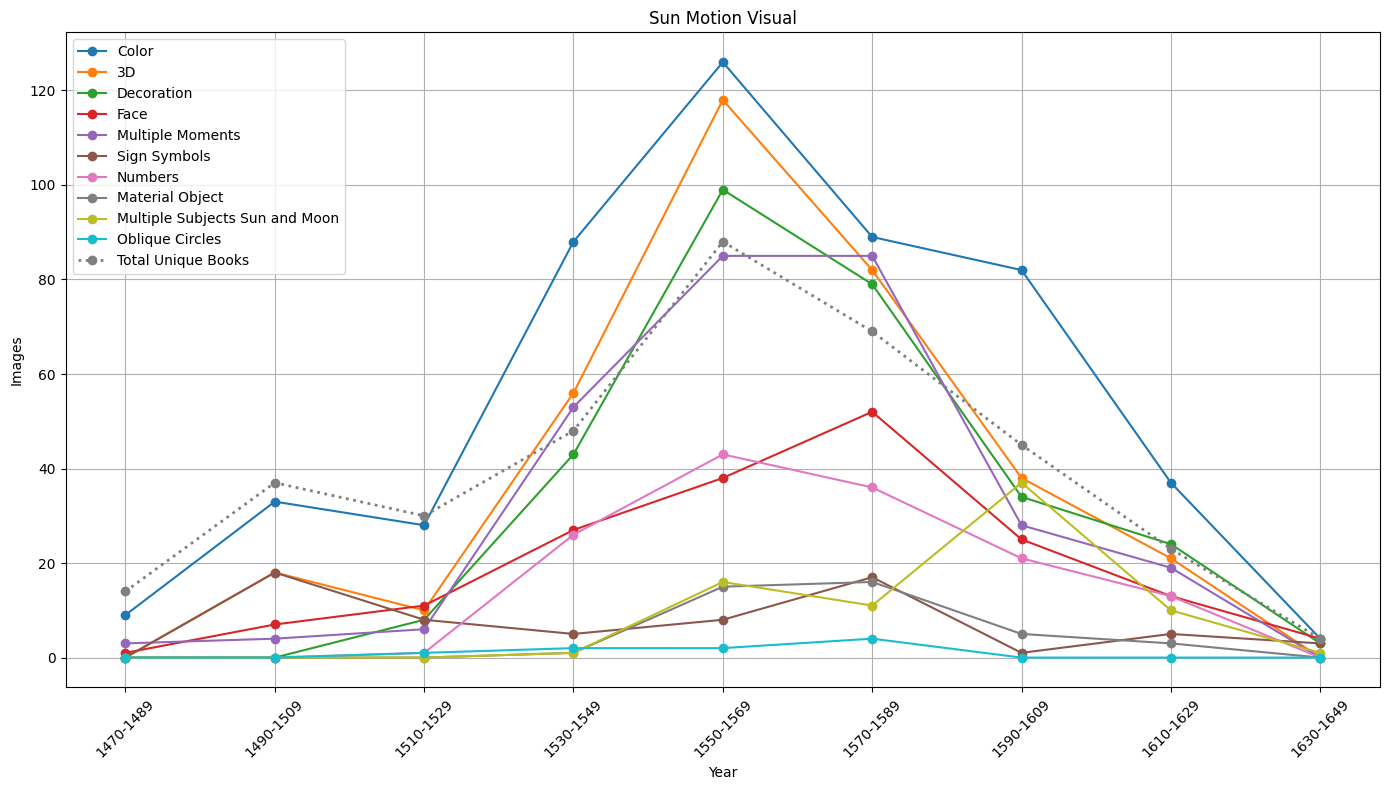

In [34]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = sun_motion_visual[sun_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
face = count_unique_images_by_column('face', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
sign_symbols = count_unique_images_by_column('sign symbols', 'yes')
numbers = count_unique_images_by_column('numbers', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')
multiple_subjects_sun_and_moon = count_unique_images_by_column('multiple subjects sun and moon', 'yes')
tabular_illustration = count_unique_images_by_column('tabular illustration', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
oblique_circles = count_unique_images_by_column('oblique circles two dimensional projection', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
   'Color': color,
   '3D': three_dimensions_effect,
   'Decoration': decoration,
   'Face': face,
   'Multiple Moments': multiple_moments,
   'Sign Symbols': sign_symbols,
   'Numbers': numbers,
   'Material Object': material_object,
   'Multiple Subjects Sun and Moon': multiple_subjects_sun_and_moon,
    'Oblique Circles': oblique_circles,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = sun_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
#ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Sun Motion Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


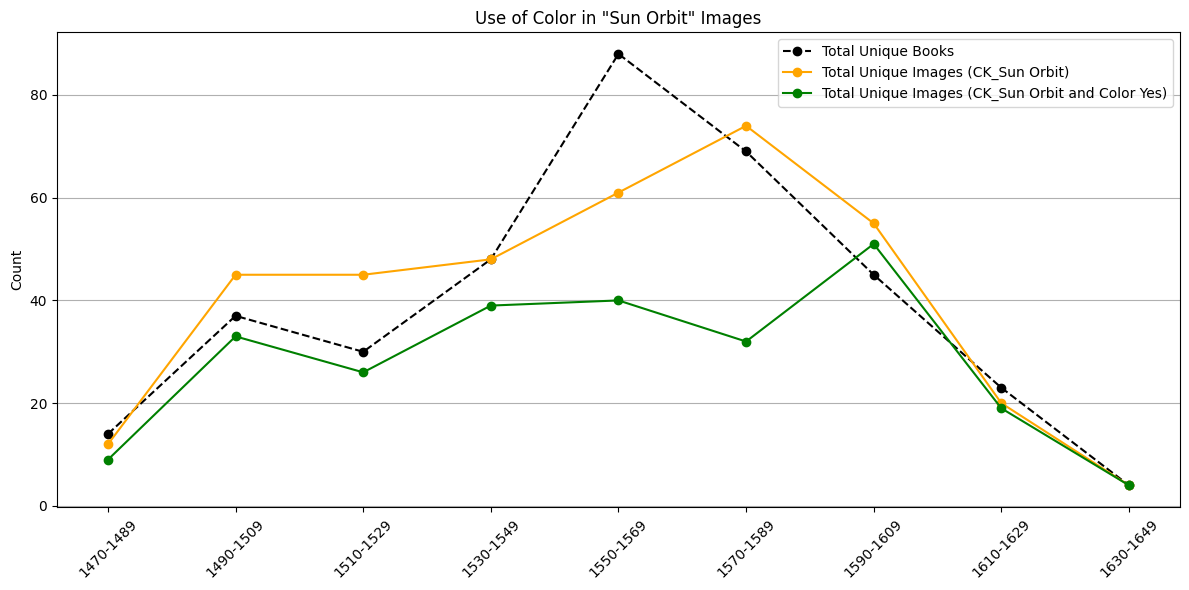

In [35]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'CK_Sun Orbit' per interval
unique_images_ck_sun_orbit = sun_motion_visual[sun_motion_visual['cks'].str.contains('CK_Sun Orbit', na=False)]
total_unique_images_ck_sun_orbit_per_interval = unique_images_ck_sun_orbit.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'CK_Sun Orbit' and 'color' as 'yes' per interval
unique_images_color_yes = unique_images_ck_sun_orbit[unique_images_ck_sun_orbit['color'] == 'yes']
total_unique_images_color_yes_per_interval = unique_images_color_yes.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Books': total_unique_books_per_interval,
    'Total Unique Images (CK_Sun Orbit)': total_unique_images_ck_sun_orbit_per_interval,
    'Total Unique Images (CK_Sun Orbit and Color Yes)': total_unique_images_color_yes_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='o', linestyle='--', color='black', label='Total Unique Books')  # Broken black line
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit and Color Yes)', color='green')

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Sun Orbit" Images')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


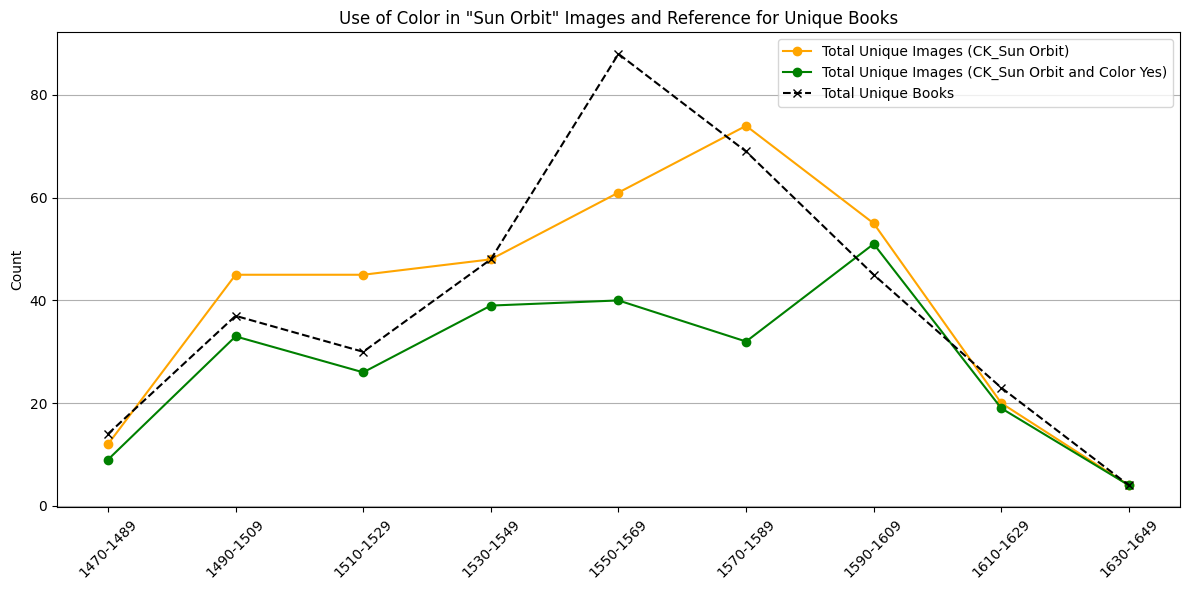

In [40]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Sun Orbit"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Sun Orbit']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'title' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Sun Orbit)': total_unique_images_per_interval,
    'Total Unique Images (CK_Sun Orbit and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Sun Orbit" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

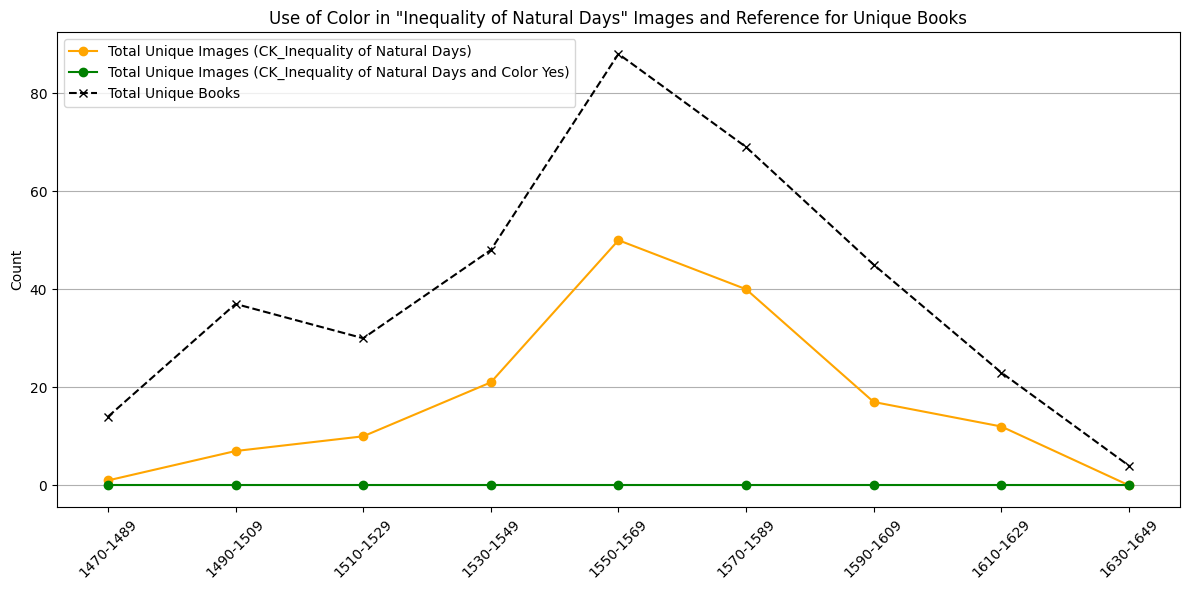

In [41]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Sun Orbit"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Inequality of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'title' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Inequality of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (CK_Inequality of Natural Days and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Inequality of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Inequality of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Inequality of Natural Days and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Inequality of Natural Days and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Inequality of Natural Days" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

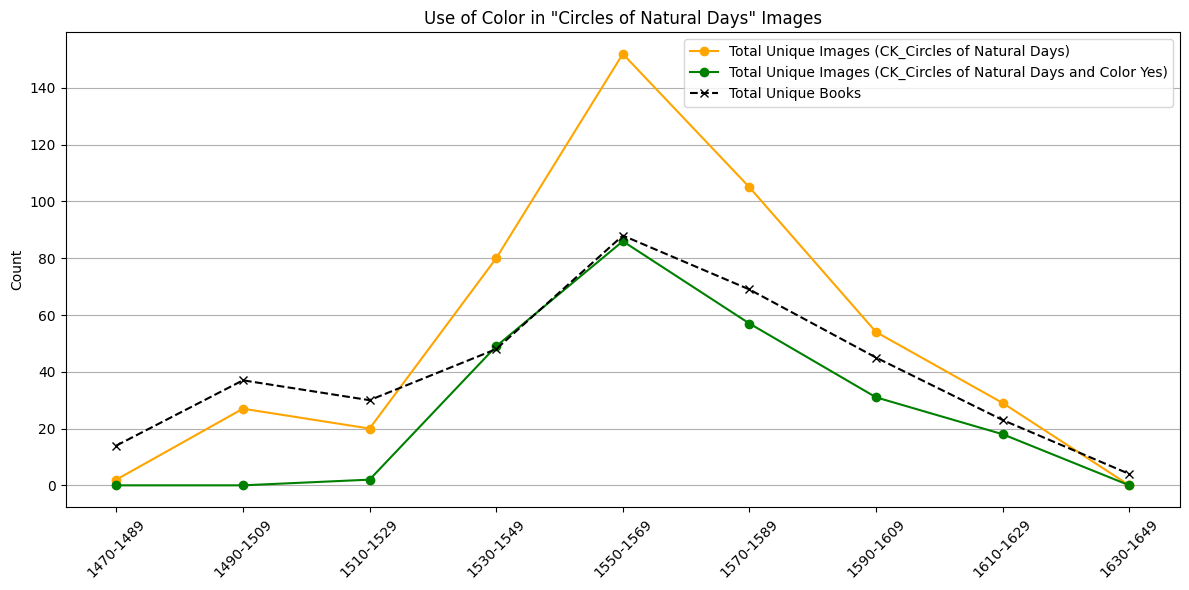

In [43]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Circles of Natural Days"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Circles of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Circles of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (CK_Circles of Natural Days and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Circles of Natural Days" Images')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

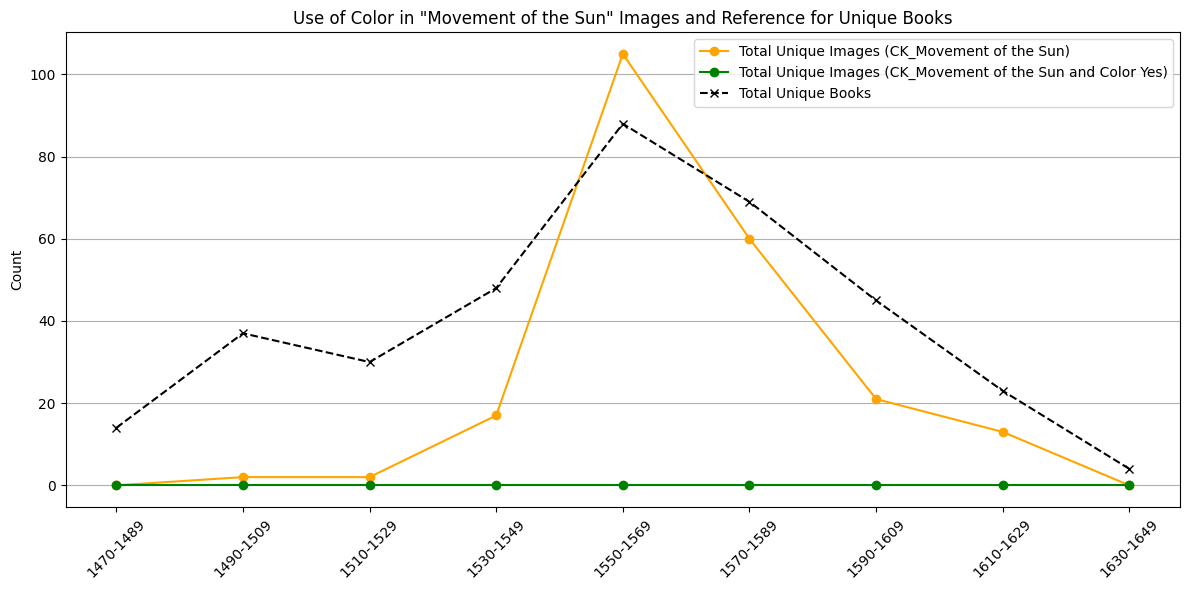

In [44]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Movement of the Sun"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Movement of the Sun']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Movement of the Sun)': total_unique_images_per_interval,
    'Total Unique Images (CK_Movement of the Sun and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Movement of the Sun)'], marker='o', linestyle='-', label='Total Unique Images (CK_Movement of the Sun)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Movement of the Sun and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Movement of the Sun and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Movement of the Sun" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

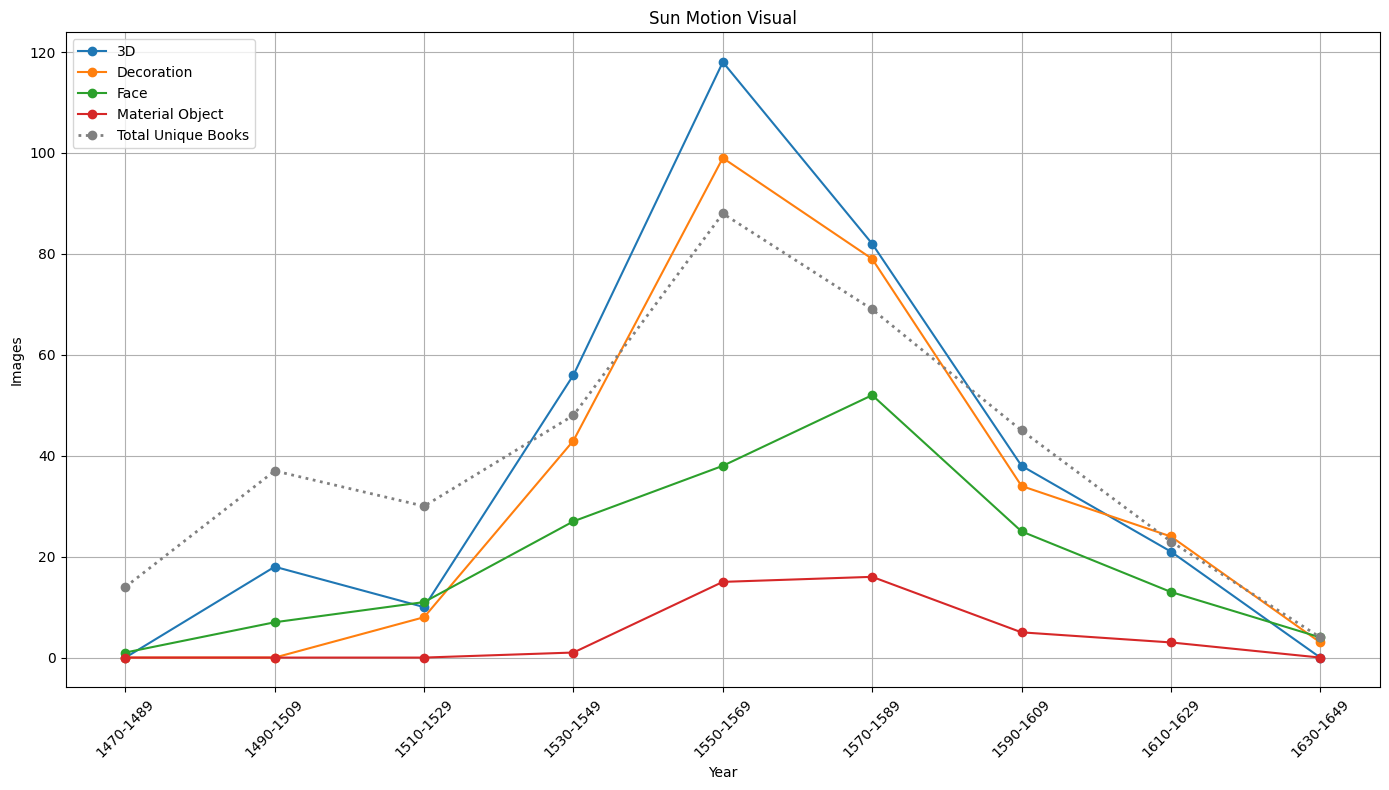

In [45]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = sun_motion_visual[sun_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
face = count_unique_images_by_column('face', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
sign_symbols = count_unique_images_by_column('sign symbols', 'yes')
numbers = count_unique_images_by_column('numbers', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')
multiple_subjects_sun_and_moon = count_unique_images_by_column('multiple subjects sun and moon', 'yes')
tabular_illustration = count_unique_images_by_column('tabular illustration', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
oblique_circles = count_unique_images_by_column('oblique circles two dimensional projection', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
#   'Color': color,
   '3D': three_dimensions_effect,
   'Decoration': decoration,
   'Face': face,
#   'Multiple Moments': multiple_moments,
#   'Sign Symbols': sign_symbols,
#   'Numbers': numbers,
   'Material Object': material_object,
#   'Multiple Subjects Sun and Moon': multiple_subjects_sun_and_moon,
#    'Oblique Circles': oblique_circles,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = sun_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
#ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Sun Motion Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


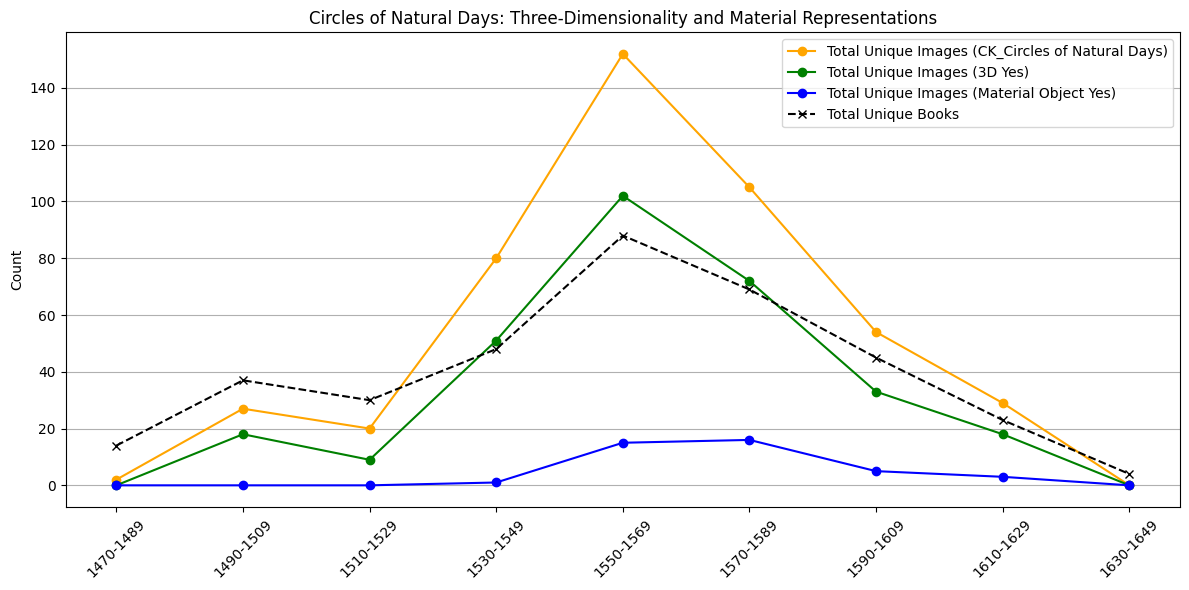

In [49]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Circles of Natural Days"
filtered = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Circles of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with '3D' as 'yes' per interval
total_unique_images_3D_yes_per_interval = filtered[filtered['3D'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'material object' as 'yes' per interval
total_unique_images_material_yes_per_interval = filtered[filtered['material object'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Circles of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (3D Yes)': total_unique_images_3D_yes_per_interval,
    'Total Unique Images (Material Object Yes)': total_unique_images_material_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (3D Yes)'], marker='o', linestyle='-', label='Total Unique Images (3D Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Material Object Yes)'], marker='o', linestyle='-', label='Total Unique Images (Material Object Yes)', color='blue')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Circles of Natural Days: Three-Dimensionality and Material Representations')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

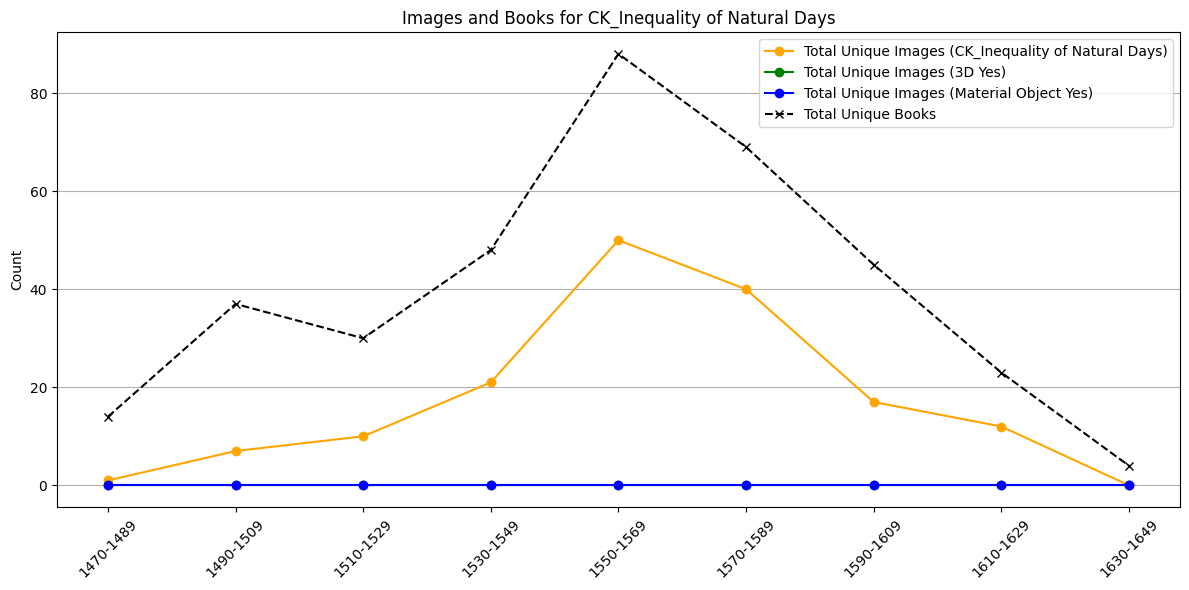

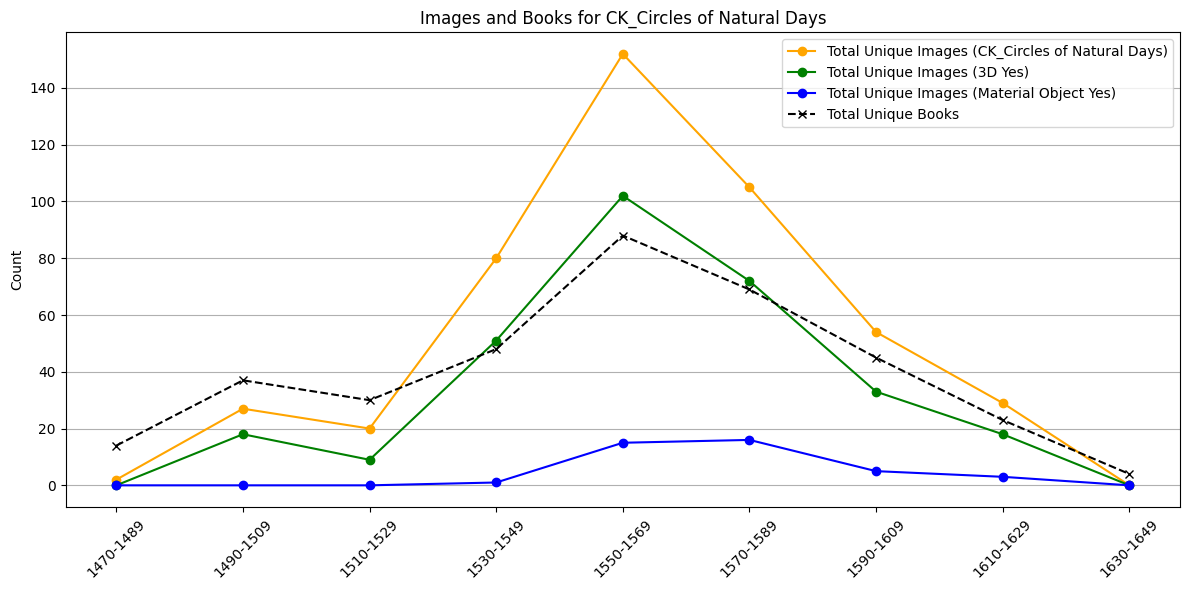

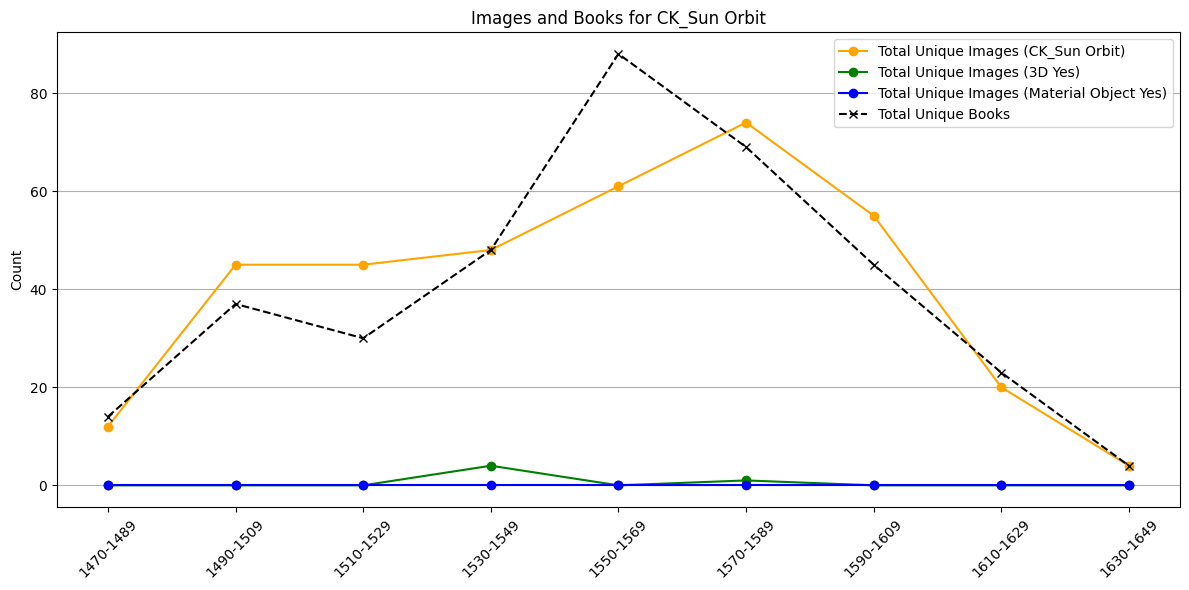

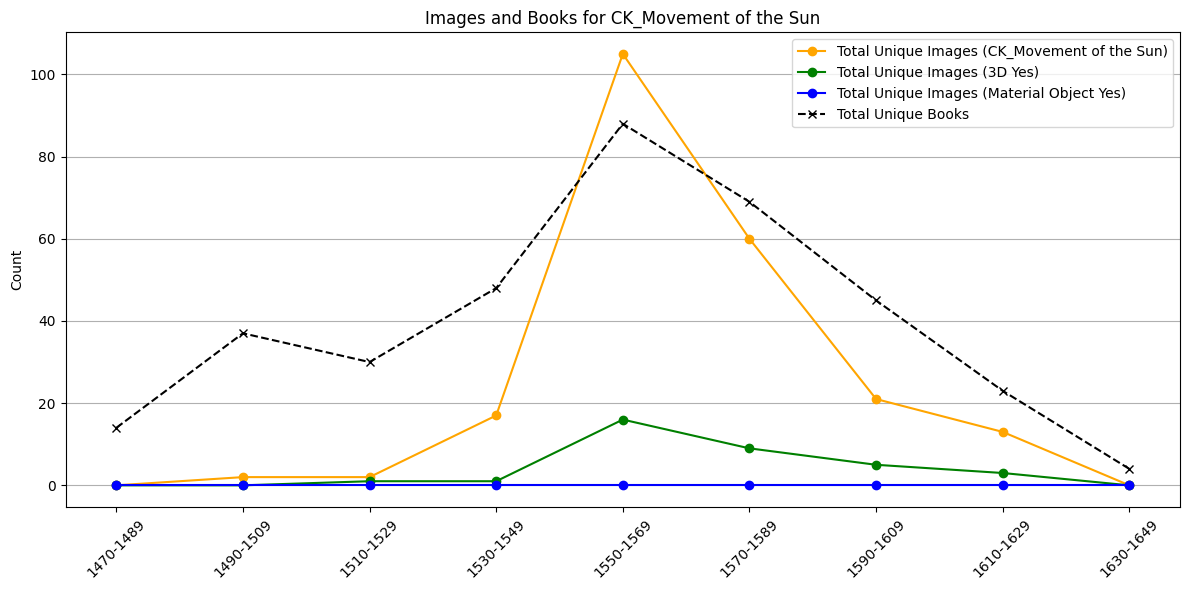

In [50]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with '3D' as 'yes' per interval
    total_unique_images_3D_yes_per_interval = filtered[filtered['3D'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'material object' as 'yes' per interval
    total_unique_images_material_yes_per_interval = filtered[filtered['material object'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (3D Yes)': total_unique_images_3D_yes_per_interval,
        'Total Unique Images (Material Object Yes)': total_unique_images_material_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (3D Yes)'], marker='o', linestyle='-', label='Total Unique Images (3D Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Material Object Yes)'], marker='o', linestyle='-', label='Total Unique Images (Material Object Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)

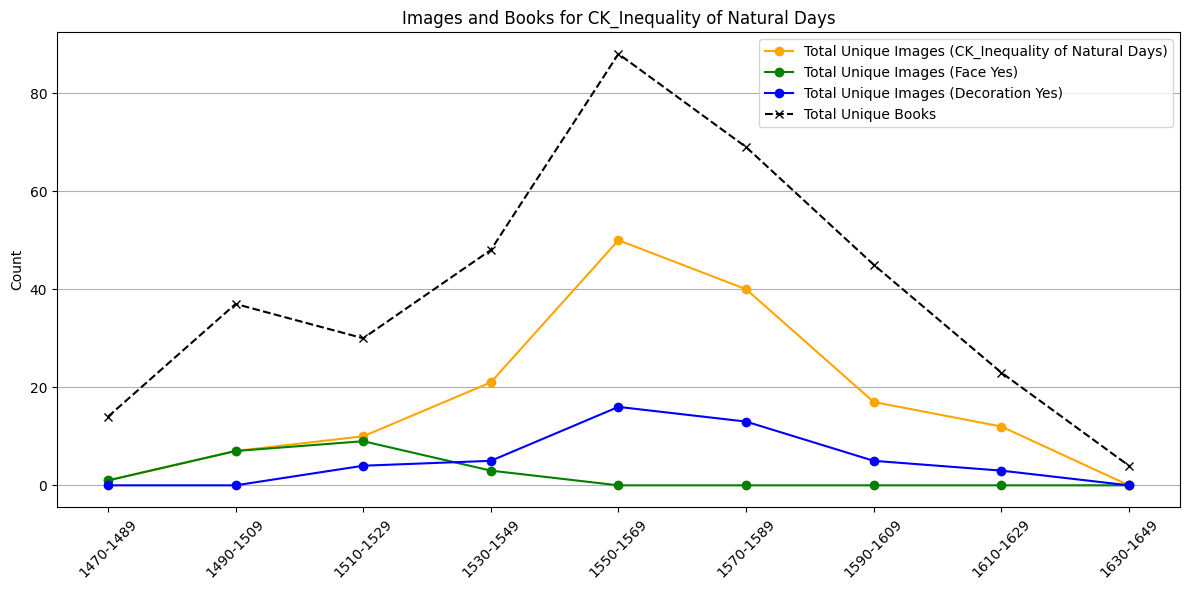

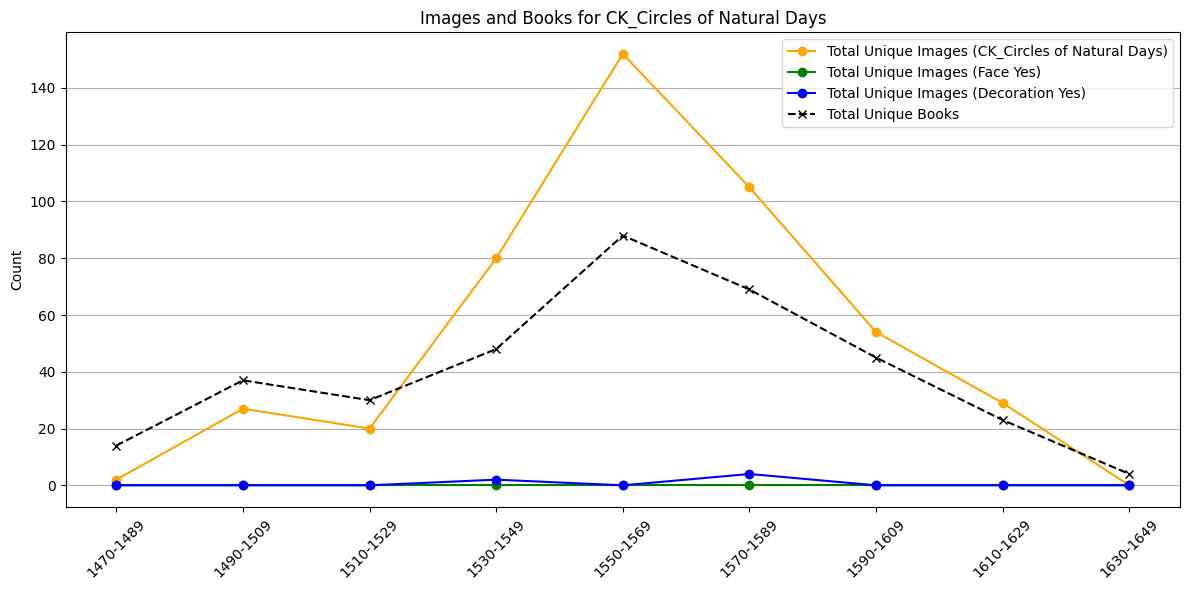

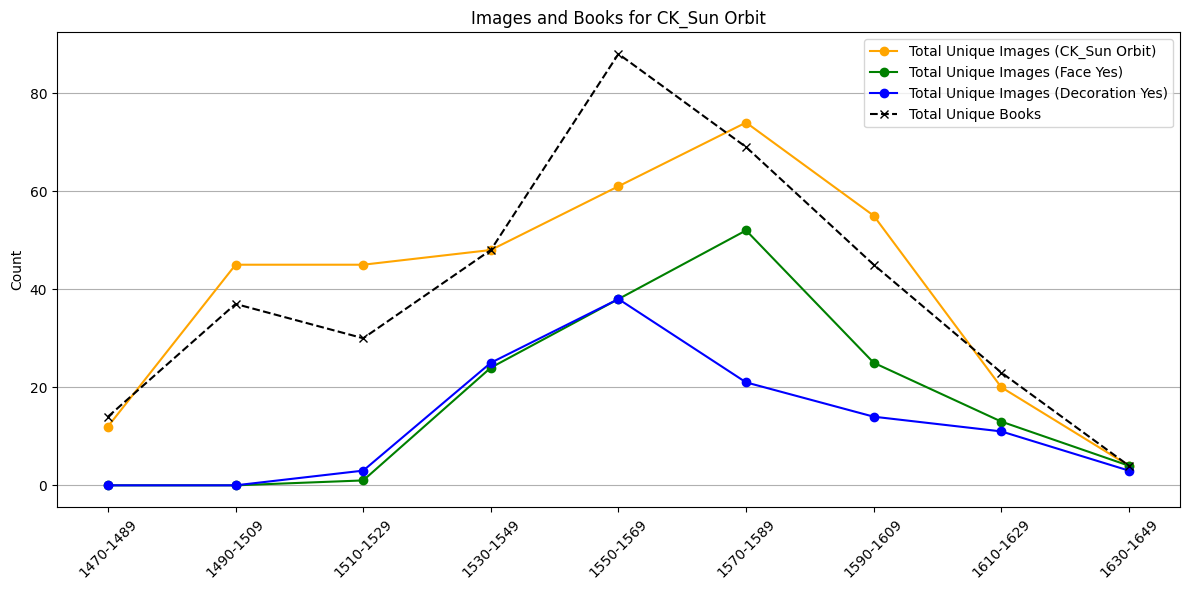

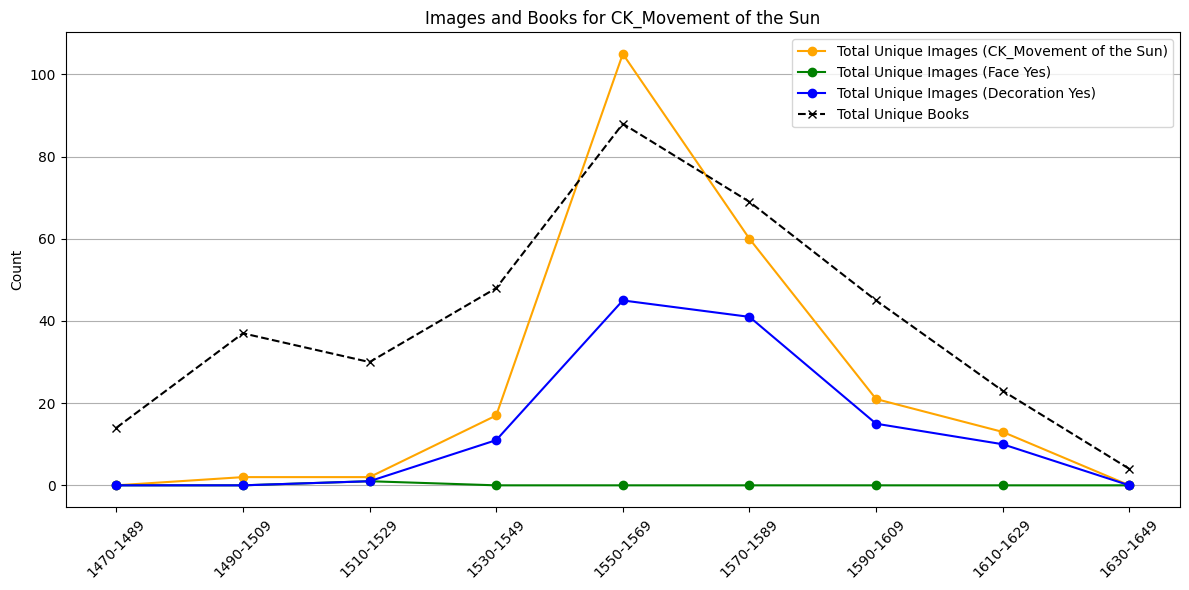

In [51]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'face' as 'yes' per interval
    total_unique_images_face_yes_per_interval = filtered[filtered['face'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'decoration' as 'yes' per interval
    total_unique_images_decoration_yes_per_interval = filtered[filtered['decoration'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (Face Yes)': total_unique_images_face_yes_per_interval,
        'Total Unique Images (Decoration Yes)': total_unique_images_decoration_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Face Yes)'], marker='o', linestyle='-', label='Total Unique Images (Face Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Decoration Yes)'], marker='o', linestyle='-', label='Total Unique Images (Decoration Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)

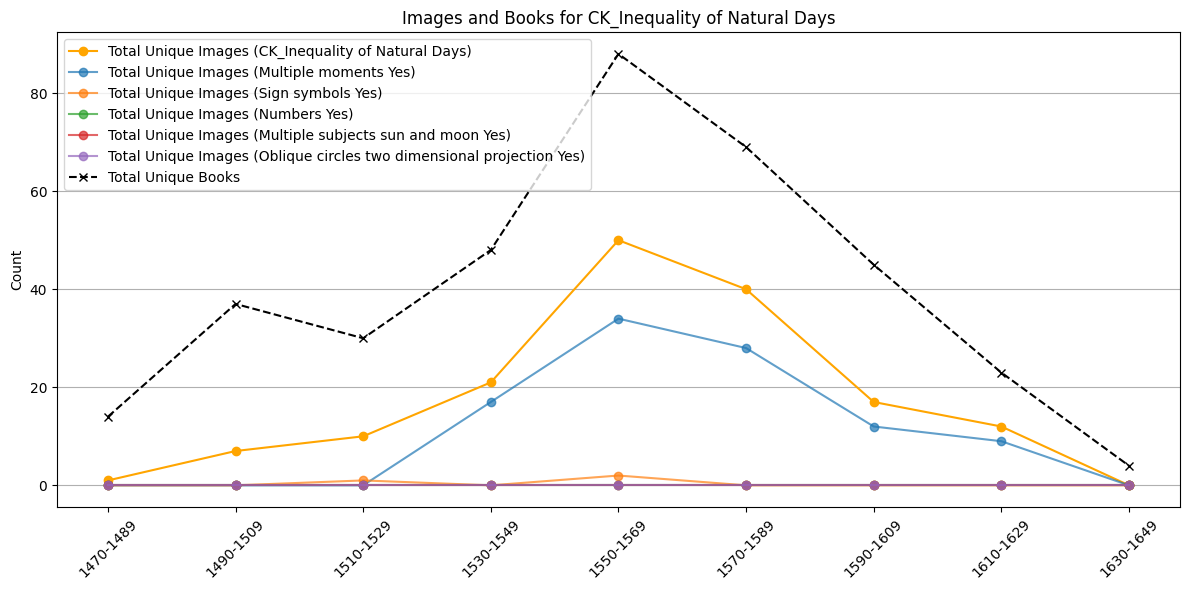

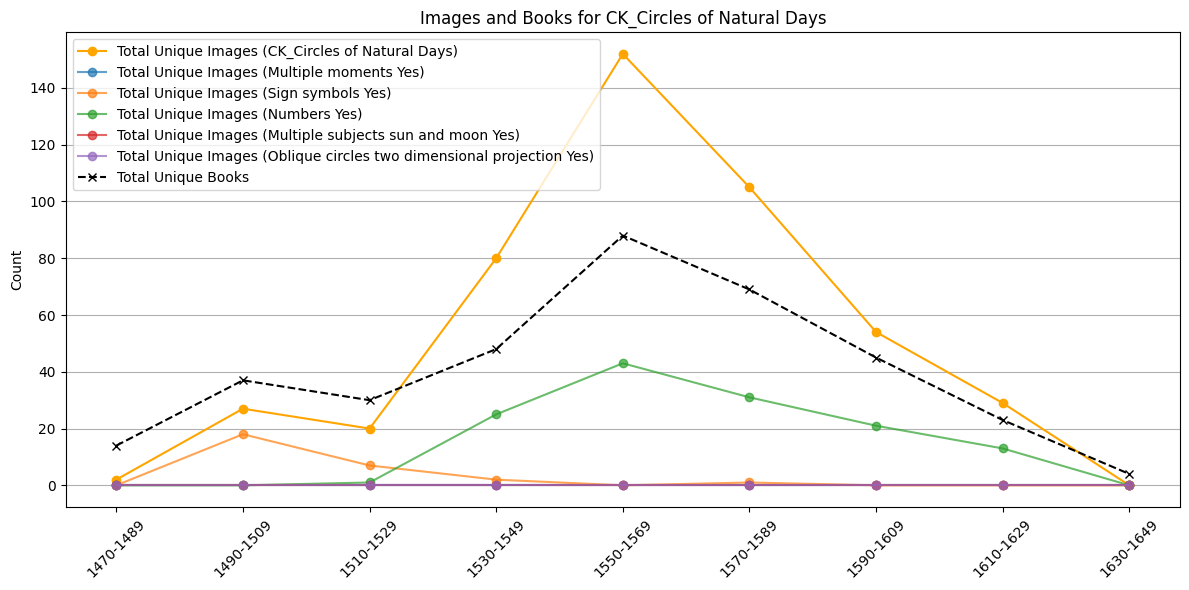

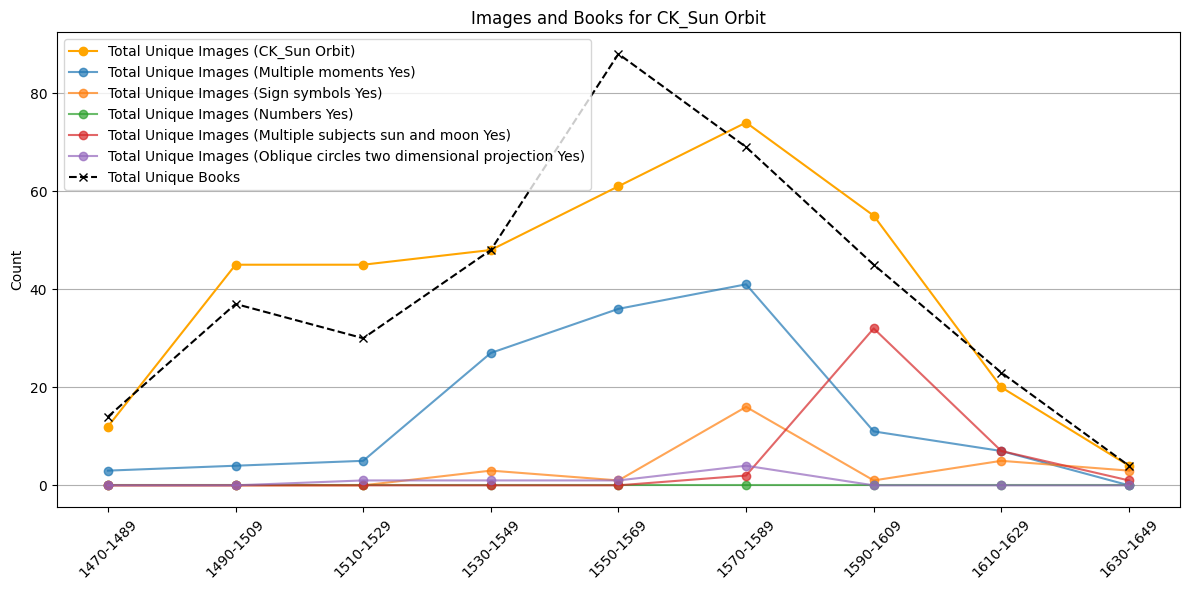

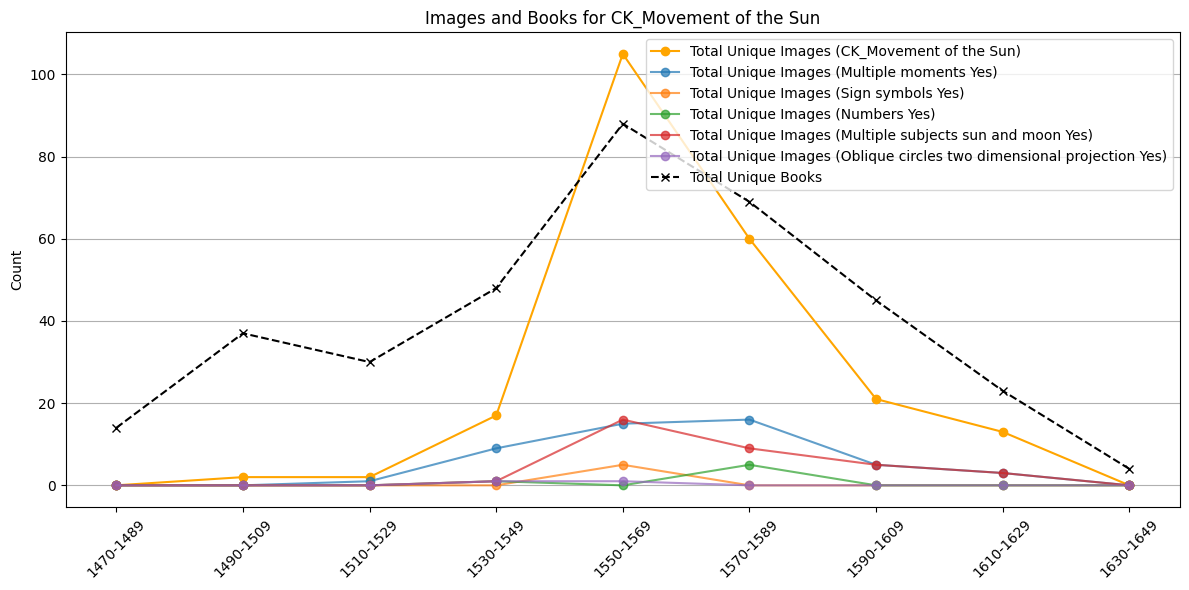

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames (replace with your actual DataFrames)
# sun_motion_visual = pd.DataFrame(...)
# books = pd.DataFrame(...)

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Define the columns to check for 'yes' values
    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    # Count unique images for each specified column
    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    
    # Plot for each of the specified attributes
    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval
    
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)


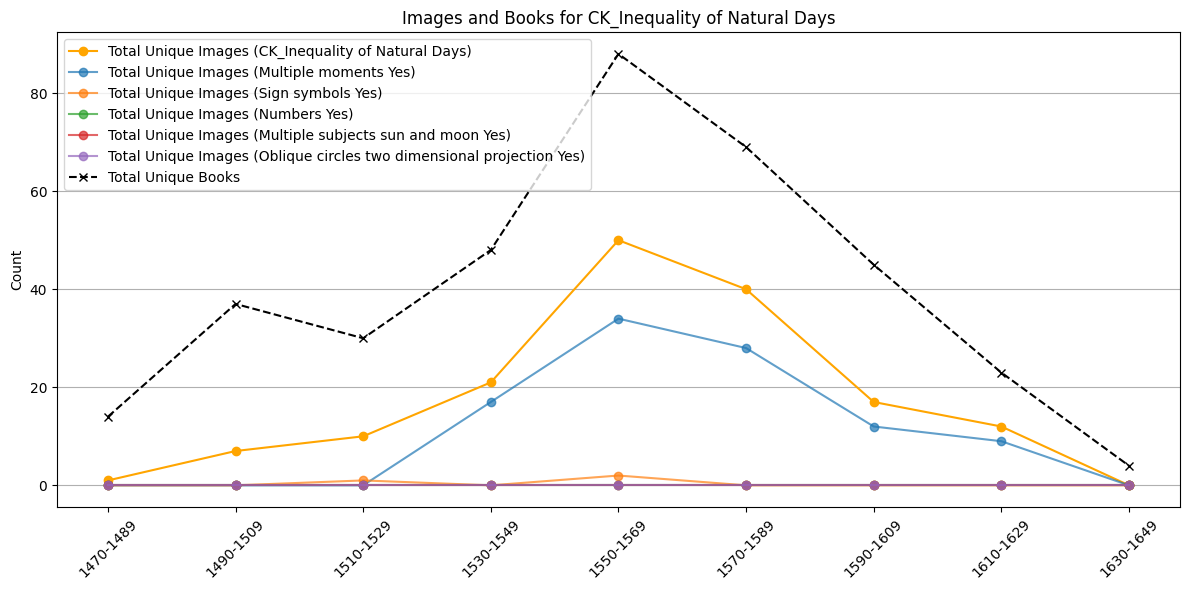

In [54]:

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Inequality of Natural Days
def plot_inequality_of_natural_days():
    keyword = 'CK_Inequality of Natural Days'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')

    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval

    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')

    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Inequality of Natural Days
plot_inequality_of_natural_days()

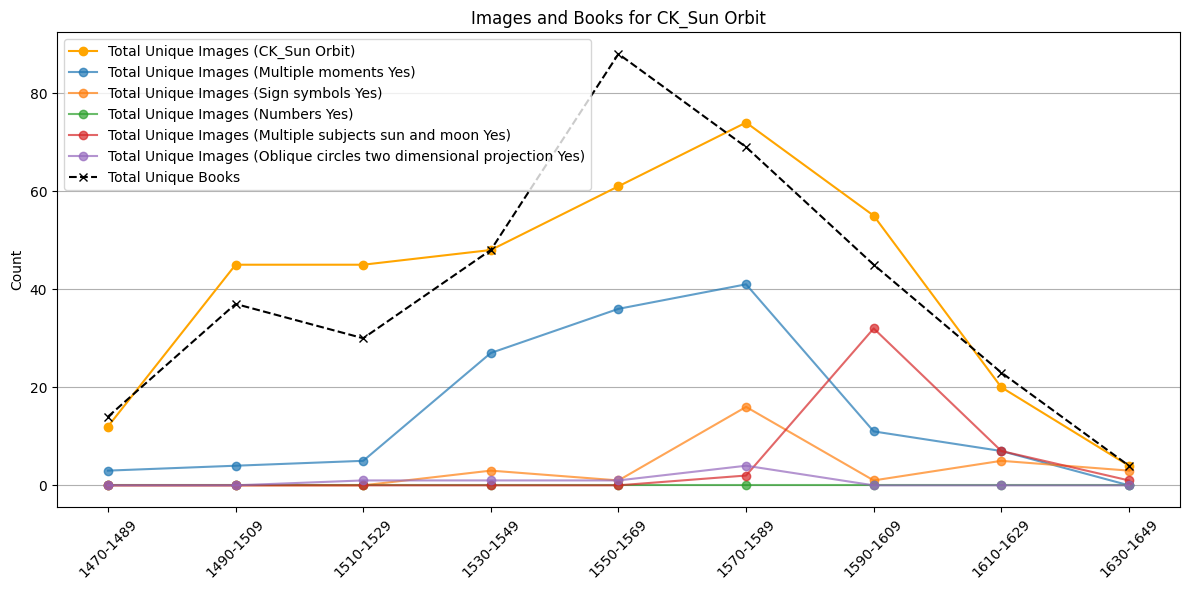

In [55]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Sun Orbit
def plot_sun_orbit():
    keyword = 'CK_Sun Orbit'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')

    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval

    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')

    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Sun Orbit
plot_sun_orbit()

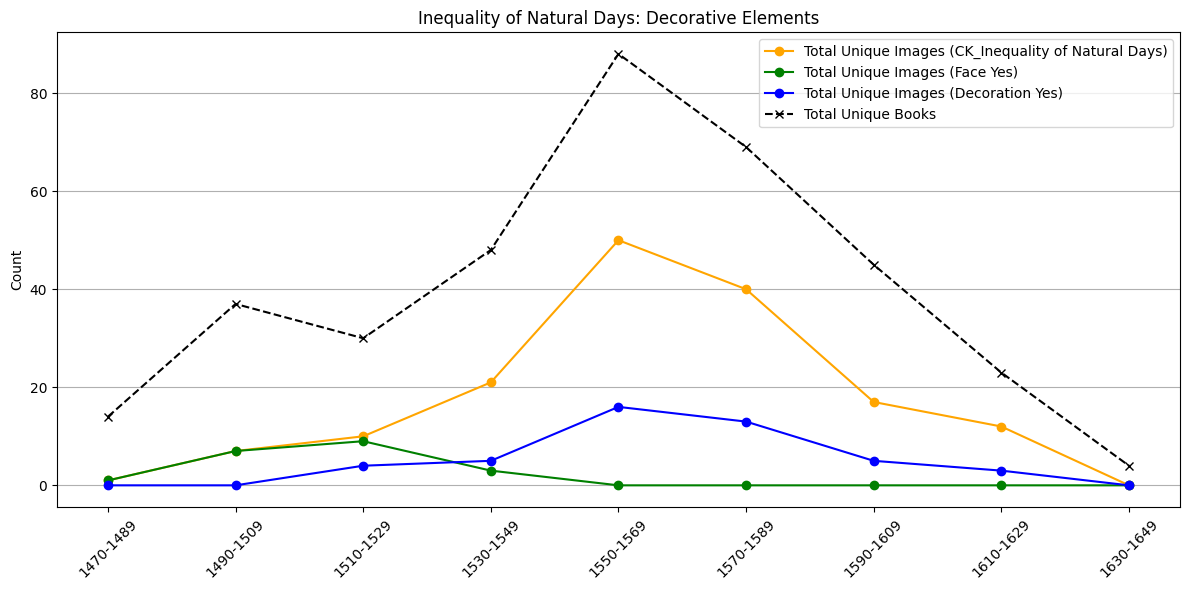

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames (replace with your actual DataFrames)
# sun_motion_visual = pd.DataFrame(...)
# books = pd.DataFrame(...)

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Inequality of Natural Days
def plot_inequality_of_natural_days():
    keyword = 'CK_Inequality of Natural Days'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'face' as 'yes' per interval
    total_unique_images_face_yes_per_interval = filtered[filtered['face'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'decoration' as 'yes' per interval
    total_unique_images_decoration_yes_per_interval = filtered[filtered['decoration'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (Face Yes)': total_unique_images_face_yes_per_interval,
        'Total Unique Images (Decoration Yes)': total_unique_images_decoration_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Face Yes)'], marker='o', linestyle='-', label='Total Unique Images (Face Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Decoration Yes)'], marker='o', linestyle='-', label='Total Unique Images (Decoration Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title('Inequality of Natural Days: Decorative Elements')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Inequality of Natural Days
plot_inequality_of_natural_days()
